

# Data Source: Inside AirBnB


http://insideairbnb.com/get-the-data/


In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# connecting to drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:

# important: _2022_airbnb_london refers to
_2022_airbnb_london = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/basic_london_listings.csv")  #, sep = ";")


print(_2022_airbnb_london.shape)

_2022_airbnb_london.head()


(66152, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20220607181843,2022-06-08,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.92,4.71,4.79,NaN,f,2,1,1,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20220607181843,2022-06-08,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.59
2,24328,https://www.airbnb.com/rooms/24328,20220607181843,2022-06-08,"Battersea live/work artist house, garden communal","Artist house, bright high ceiling rooms for bo...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/c4ffa398-ebfd...,41759,https://www.airbnb.com/users/show/41759,...,4.93,4.58,4.64,NaN,f,1,1,0,0,0.67
3,17506,https://www.airbnb.com/rooms/17506,20220607181843,2022-06-08,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,17402,https://www.airbnb.com/rooms/17402,20220607181843,2022-06-08,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.68,4.87,4.57,NaN,f,3,3,0,0,0.36


important variables: description and name!

In [ ]:
## reading in March 2023 data


_2023_airbnb_london = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/2023_london_basic_listings.csv")  #, sep = ";")

_2023_airbnb_london.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,714569379355913481,https://www.airbnb.com/rooms/714569379355913481,20230314070633,2023-03-14,city scrape,Lovely private bedroom in Muswell Hill.,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,39009854,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,808038970516277767,https://www.airbnb.com/rooms/808038970516277767,20230314070633,2023-03-14,city scrape,Studio Flat Franklin London,Brand New Modern Kitchen<br />Close to Excelle...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495977998,...,NaN,NaN,NaN,NaN,t,7,7,0,0,NaN
2,822557738577472503,https://www.airbnb.com/rooms/822557738577472503,20230314070633,2023-03-14,city scrape,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Enjoy easy access to everything from this perf...,NaN,https://a0.muscache.com/pictures/d77957d5-695a...,325629338,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
3,3518856,https://www.airbnb.com/rooms/3518856,20230314070633,2023-03-14,city scrape,Wimbledon Double Bedroom Ensuite,A welcoming and stylish 2 bedroom 2 bathroom f...,NaN,https://a0.muscache.com/pictures/23a18442-fc1d...,187811,...,5.0,3.67,3.67,NaN,f,2,0,2,0,0.05
4,4876550,https://www.airbnb.com/rooms/4876550,20230314070633,2023-03-14,city scrape,Stunning Apartment 2 minutes walk to Tube Station,Luxury Modern Apartment in modern development ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25087384,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [ ]:
## only keeping important columns in the _2023_airbnb_london df


important_cols = ['id', 'name', 'description', 'number_of_reviews']
_2023_airbnb_london = _2023_airbnb_london[important_cols]

# renaming columns

_2023_airbnb_london.columns = ['id', 'name_2023', 'description_2023', 'number_of_reviews_2023']

In [ ]:
_2023_airbnb_london

,id,name_2023,description_2023,number_of_reviews_2023
0,714569379355913481,Lovely private bedroom in Muswell Hill.,Take a break and unwind at this peaceful oasis.,0
1,808038970516277767,Studio Flat Franklin London,Brand New Modern Kitchen<br />Close to Excelle...,0
2,822557738577472503,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Enjoy easy access to everything from this perf...,0
3,3518856,Wimbledon Double Bedroom Ensuite,A welcoming and stylish 2 bedroom 2 bathroom f...,4
4,4876550,Stunning Apartment 2 minutes walk to Tube Station,Luxury Modern Apartment in modern development ...,0
...,...,...,...,...
75236,654949753111689538,small but nice studio flat in London,Hello this is a nice studio flat in Willesden ...,23
75237,827653589245352551,"Huge Period 1-bed, 2-bath, Patio, Great Location",Treat yourself and stay in this large 1-bedroo...,2
75238,29625947,Bright double room Greenwich for solo female,A bright spacious room in a small apartment id...,0
75239,21700003,Quiet and spacious room in garden flat London,The flat is newly refurbished with wooden floo...,5


Now merging the two DFs with an inner join to only retain listings which were active for both snapshots.

In [ ]:
airbnb_london = pd.merge(_2022_airbnb_london, _2023_airbnb_london, on='id', how='inner')
airbnb_london.shape


(49923, 77)

In [ ]:
airbnb_london.index = range(airbnb_london.shape[0])

In [ ]:
### tripping descriptions of html tags

def get_rid_html_tags(description_) -> str:

  """This function removes all html tags like '/><b>', '/>' etc from the descriptions """

  cleaned_des = description_.replace('br ', '')
  cleaned_des = cleaned_des.replace('b>', ' ').replace('/', ' ').replace('<', ' ').replace('>', ' ').lstrip()
  cleaned_des = cleaned_des.replace('        ', ' ').replace('       ', ' ').replace('      ', ' ').replace('     ', ' ').replace('    ', ' ' ).replace('   ', ' ').replace('  ', ' ')

  return cleaned_des


In [ ]:
airbnb_london.description = airbnb_london.description.apply(lambda x: get_rid_html_tags(str(x)) )
airbnb_london.description_2023 = airbnb_london.description_2023.apply(lambda x: get_rid_html_tags(str(x)) )


The research design works under the assumption that the titles and the descriptioons did not change from July 2022 to March 2023. Checking this:

In [ ]:
same_name_des = 0
same_name = 0
same_des = 0

for i in range(airbnb_london.shape[0]):

  if (airbnb_london.name[i] == airbnb_london.name_2023[i]) & ( airbnb_london.description[i] == airbnb_london.description_2023[i] ):
    same_name_des += 1

  if (airbnb_london.name[i] == airbnb_london.name_2023[i]) :
    same_name += 1

  if  ( airbnb_london.description[i] == airbnb_london.description_2023[i] ):
    same_des += 1


print(f'{np.round((same_name_des/airbnb_london.shape[0])  *100 )} percent of listings have not changed when it comes to name and description.')
print(f'{np.round((same_name/airbnb_london.shape[0])  *100 )} percent of listings have not changed when it comes to name .')
print(f'{np.round((same_des/airbnb_london.shape[0])  *100 )} percent of listings have not changed when it comes to description.')


81.0 percent of listings have not changed when it comes to name and description.
92.0 percent of listings have not changed when it comes to name .
84.0 percent of listings have not changed when it comes to description.


Manual examination if, maybe, these changes are just minute:

with a few exceptions, the changes truly are minute.

Let's compute the Levenshtein distance amongst the strings:

"Simply put, edit distance is a measurement of how many changes we must do to one string to transform it into the string we are comparing it to."

https://web.stanford.edu/class/cs124/lec/med.pdf

In [ ]:

airbnb_london.description[1]

"Lots of windows and light. St Luke's Gardens are at the end of the block, and the river not too far the other way. Ten minutes walk if you go slowly. Buses to everywhere round the corner and shops, restaurants, pubs, the cinema and Waitrose . The space Bright Chelsea Apartment This is a bright one bedroom ground floor apartment in an interesting listed building. There is one double bedroom and a living room kitchen The apartment has a full bathroom and the kitchen is fully equipped. Two wardrobes are available exclusively for guests and bedside tables and two long drawers. This sunny convenient compact flat is just around the corner from the Waitrose supermarket and all sorts of shops, cinemas, restaurants and pubs. This is a lovely part of London. There is a fun farmers market in the King's Road at the weekend. Buses to everywhere are just round the corner, and two underground stations are within ten minutes "

In [ ]:
airbnb_london.description_2023[1]

"Lots of windows and light. St Luke's Gardens are at the end of the block, and the river not too far the other way. Ten minutes walk if you go slowly. Buses to everywhere round the corner and shops, restaurants, pubs, the cinema and once again Waitrose . The space Bright Chelsea Apartment This is a bright one bedroom ground floor apartment in an interesting listed building. There is one double bedroom and a living room kitchen The apartment has a full bathroom and the kitchen is fully equipped. Two wardrobes are available exclusively for guests and bedside tables and two long drawers. This sunny convenient compact flat is just around the corner from the Waitrose supermarket and all sorts of shops, cinemas, restaurants and pubs. This is a lovely part of London. There is a fun farmers market in the King's Road at the weekend. Buses to everywhere are just round the corner, and two underground stations are within ten min"

In [ ]:
from fuzzywuzzy import fuzz ## https://pypi.org/project/fuzzywuzzy/
## token sort ration - Levenstein distance after sorting the tokens - not so important for me
## Token Set Ratio - LD also controlling for duplication of words

levensthein_scores_des = np.ones(airbnb_london.shape[0])
levensthein_scores_name = np.ones(airbnb_london.shape[0])

for i in range(airbnb_london.shape[0]):
  levensthein_scores_des[i]  = fuzz.ratio( airbnb_london.description[i], airbnb_london.description_2023[i])
  levensthein_scores_name[i]  = fuzz.ratio( str(airbnb_london.name[i]), str(airbnb_london.name_2023[i]))


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


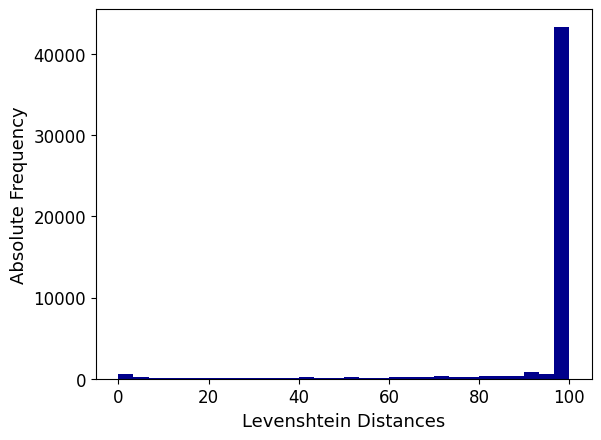

In [ ]:
import matplotlib.pyplot as plt

plt.hist(levensthein_scores_des, bins = 30, color = "darkblue")
plt.xlabel("Levenshtein Distances", fontsize=13)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.savefig("Levenshtein_Distances_Descriptions.png")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Levenshtein_Distances_Descriptions.png",  bbox_inches="tight")
plt.show()


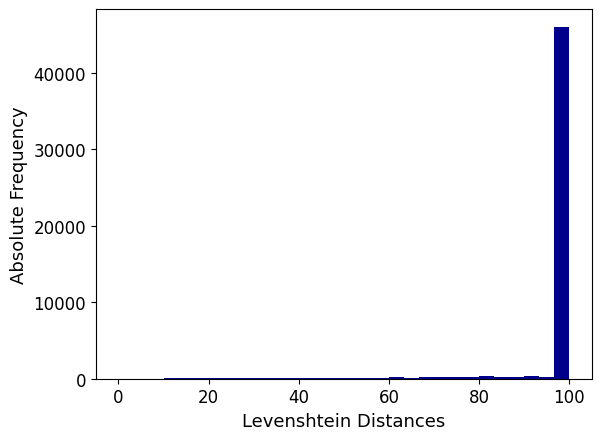

In [ ]:
plt.hist(levensthein_scores_name, bins = 30, color = "darkblue")
plt.xlabel("Levenshtein Distances", fontsize=13)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Levenshtein_Distances_Names.png",   bbox_inches="tight")
plt.show()

Hence, most "changed" names and descriptions only contain negligible changes.
I shall remove all those datapoints from the dataset where the change lead to a Levenshtein Score below 0.9.

In [ ]:
shape_before = airbnb_london.shape[0]

airbnb_london.levensthein_scores_des = levensthein_scores_des
airbnb_london.levensthein_scores_name = levensthein_scores_name

airbnb_london = airbnb_london[(airbnb_london.levensthein_scores_des >= 90 ) & (airbnb_london.levensthein_scores_name >= 90  )]

shape_now = airbnb_london.shape[0]

difference_due_to_filtering = shape_before - shape_now
print(f'{np.round(difference_due_to_filtering/shape_before * 100, 2)} percent were lost due to too great changes in either name or description.')


13.77 percent were lost due to too great changes in either name or description.


<ipython-input-15-3fa22aa3f4a1>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  airbnb_london.levensthein_scores_des = levensthein_scores_des
<ipython-input-15-3fa22aa3f4a1>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  airbnb_london.levensthein_scores_name = levensthein_scores_name


In [ ]:
airbnb_london.shape

(41894, 77)

### Dealing with the number of reviews as proxy for occupancy

Now computing score for difference in the number of reviews as dependent variable in the discriminator.



In [ ]:
airbnb_london["review_diff"] = airbnb_london.number_of_reviews_2023 - airbnb_london.number_of_reviews

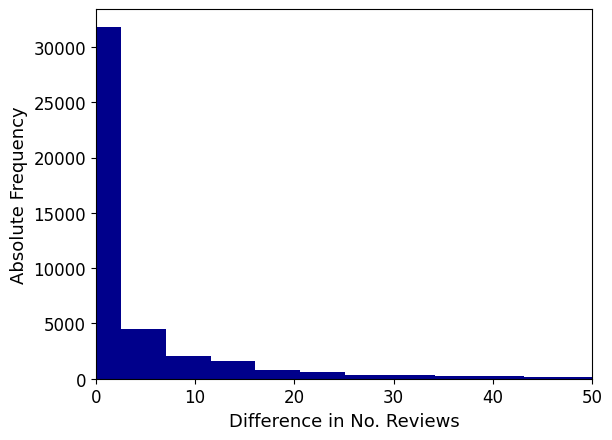

In [ ]:
plt.hist(airbnb_london.review_diff, bins = 100, color='darkblue')
plt.xlim(0,50)
plt.xlabel("Difference in No. Reviews", fontsize=13)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.savefig("Diff_Reviews.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Diff_Reviews.png",  bbox_inches="tight")
plt.show()


The ditribution is highly uneven. Thus, just using the number and appiyng it to a regression problem can yield problems. Categorizing the differences and treating the training of the discriminator as a categorization problem can help:

In [ ]:
# most succesful third for using in the training of the discriminator ?!

q_2_3 = np.quantile(airbnb_london.review_diff, 2/3)
print(f'When only using the top 33% best performing listings in the training of the discriminator, one can still use {airbnb_london[airbnb_london.review_diff > q_2_3].shape[0]} samples.')

When only using the top 33% best performing listings in the training of the discriminator, one can still use 12506 samples.


In [ ]:
## extra variable (binary) to indicate if datapoint is within top third

airbnb_london["in_top_third"] = 0
airbnb_london.in_top_third[airbnb_london.review_diff > q_2_3] = 1

In [ ]:
# 3-fold categorization of review_diff as outcome in

print("Q1 quantile of arr : ", np.quantile(airbnb_london.review_diff, 1/3))
print("Q2 quantile of arr : ", np.quantile(airbnb_london.review_diff, 2/3))


Q1 quantile of arr :  0.0
Q2 quantile of arr :  3.0


In [ ]:
## extra variable (1-3) to indicate if datapoint is within top third

airbnb_london["proxy"] = 0
airbnb_london.proxy[airbnb_london.review_diff == 0] = 1
airbnb_london.proxy[airbnb_london.review_diff.isin([1,2,3])] = 2
airbnb_london.proxy[airbnb_london.review_diff > 3] = 3


In [ ]:

# Frequencies:
# 3 - 12656
# 2 - 13676.0
# 1 - 15562


13676.0

A few data points contain no listing title or description.
These shall be removed from the dataframe to be used!


Btw.: Checking for empty samples if, of course, logical, but can also be motivated by Aumiller, Gertz (2023).


### further filtering


*  filtering out listiing, which are hostel rooms (or just not private accomondations)
* -> saving of intermediary results
* filtering out such listings with a too-short name
* filtering out based on too short descriptions
* filtering based on compression ratio further filters:
* -> saving of final results

I shall also always measure which perentage of all data is lost due to each filtering step!


In [ ]:
# firstly, checking for duplicates (also might be motivated by Aumiller, Gertz (2023))

len(airbnb_london.id.unique()) == airbnb_london.shape[0]


True

In [ ]:
# filtering for property type

dp_old = airbnb_london.shape[0]
overall_datapoints = dp_old

airbnb_london_filtered = airbnb_london[(airbnb_london.room_type == 'Entire home/apt') | (airbnb_london.room_type == 'Private room') ]

dp_new = airbnb_london_filtered.shape[0]

# to check
print(airbnb_london_filtered.room_type.value_counts())

difference = dp_old - dp_new
print(f'{np.round(difference/dp_old * 100, 2)} percent were lost due to this filter.')


Entire home/apt    28102
Private room       21302
Name: room_type, dtype: int64
1.04 percent were lost due to this filter.


In [ ]:
## saving intermediary results

airbnb_london_filtered.to_csv("/content/gdrive/My Drive/Thesis/London_Data/airbnb_london_filtered_basic.csv")

#### Continuing the filtering: for the filtering based on the length of both the description and the title, it is nice to firstly consider the distriution of those lengths, respectively.

In [ ]:
import re

def remove_non_alpha_lower(input: str) -> list:
  """
  This function removes all charachters but alphhanumeric ones
  and maps abluell words to lower-case.
  This is needed for the lenghts (measured in words) for the name
  and the descriptions and for checking the 'extractiveness'.
  """

  regex = re.compile('[^a-zA-Z]')

  input = input.split()
  words = [regex.sub('', a) for a in input]
  # removing blank spaces etc and only using lower words
  words = [a.lower() for a in words if a.isalpha()]

  return words


def len_of_non_alpha_lower(input: str) -> int:
  """
  This function computes the length of the function above.
  """

  output = remove_non_alpha_lower(input)
  return len(output)

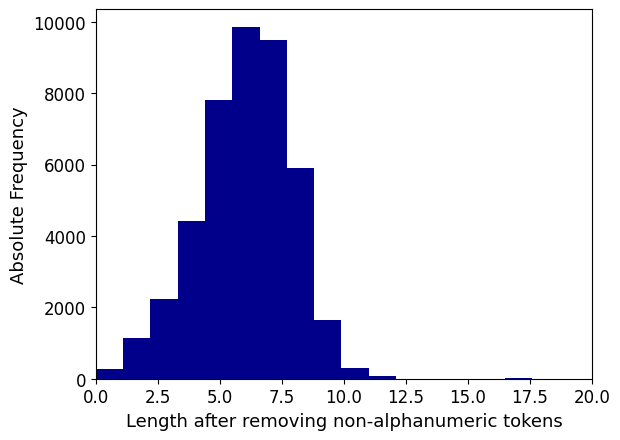

In [ ]:
import matplotlib.pyplot as plt

name_lengths  = airbnb_london.name.apply(lambda x: int(len_of_non_alpha_lower(str(x)) ) )

plt.hist(name_lengths, bins = 40, color = "darkblue")
plt.xlim(0, 20)
plt.xlabel("Length after removing non-alphanumeric tokens", fontsize=13)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Distribution_Length_Names.png", bbox_inches="tight")

plt.show()

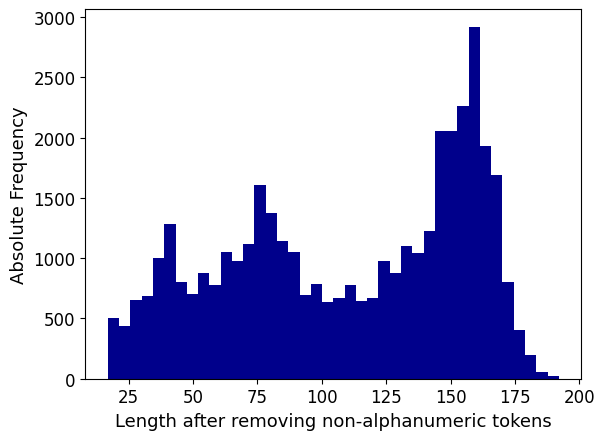

In [ ]:
#import matplotlib.pyplot as plt


name_des  = airbnb_london.description.apply(lambda x: int(len_of_non_alpha_lower(str(x)) ) )

plt.hist(name_des, bins = 40, color = "darkblue")
plt.xlabel("Length after removing non-alphanumeric tokens", fontsize=13)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.savefig("Distribution_Length_Descriptions.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Distribution_Length_Descriptions.png",  bbox_inches="tight")
plt.show()


... a few cases with no more than 50 characters - that might be a bit short.

In [ ]:

## name > 5
## description > XXX

###### Lookiing for evidence in papers !!

Aumiller Gertz (2023): 2)	minimum text length (20 char for sum, 50 for doc) --> infeasible here
also: 3)	compression ratio (doc min. 25% longer)
also: full extractiveness -> only importabbt for extractive algorithms (also: Bommasani, Rishi; Cardie, Claire (2020): Intrinsic Evaluation of Summarization Datasets.)





In [ ]:
## removing of too short names & descriptions
dp_old = airbnb_london_filtered.shape[0]

# extra columns for name and description lengths
airbnb_london_filtered['name_len'] = airbnb_london_filtered.apply(lambda x: int(len_of_non_alpha_lower(str(x['name']) )  ) , axis=1)
airbnb_london_filtered['des_len'] = airbnb_london_filtered.apply(lambda x: int(len_of_non_alpha_lower(str(x['description']) )  ) , axis=1)


# filtering based on that
airbnb_london_filtered_2 = airbnb_london_filtered[(airbnb_london_filtered.name_len >= 5) & (airbnb_london_filtered.des_len >= 25) ].copy()

dp_new = airbnb_london_filtered_2.shape[0]

difference = dp_old - dp_new
print(f'{np.round(difference/overall_datapoints * 100, 2)} percent were lost due to this filter.')


<ipython-input-58-9aa8000576e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_london_filtered['name_len'] = airbnb_london_filtered.apply(lambda x: int(len_of_non_alpha_lower(str(x['name']) )  ) , axis=1)
<ipython-input-58-9aa8000576e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_london_filtered['des_len'] = airbnb_london_filtered.apply(lambda x: int(len_of_non_alpha_lower(str(x['description']) )  ) , axis=1)


In [ ]:
## now using compression ratio:


airbnb_london_filtered_2['compression_ratio'] = airbnb_london_filtered_2.apply(lambda x: x['name_len']/ x['des_len'], axis = 1)
airbnb_london_filtered_2['compression_ratio']

#airbnb_london_filtered.columns #['name_len']


0        0.035928
2        0.038217
3        0.041096
4        0.041096
5        0.039735
           ...   
49917    0.066667
49918    0.101449
49919    0.031447
49920    0.069767
49922    0.048780
Name: compression_ratio, Length: 38134, dtype: float64

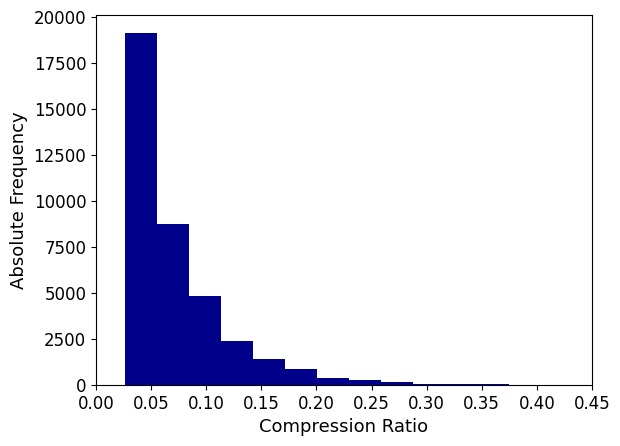

In [ ]:

plt.hist(airbnb_london_filtered_2['compression_ratio'], bins = 40, color = "darkblue")
plt.xlim(0, 0.45)
plt.xlabel("Compression Ratio", fontsize=13)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.savefig("Distribution_Compression_Ratio.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Distribution_Compression_Ratio.png",  bbox_inches="tight")
plt.show()

In [ ]:
## compression ratio should not be an issue here - still filtering based on this metric:
dp_old = airbnb_london_filtered_2.shape[0]

# filtering - descriptions should be at least 25% longer

min_ratio = 1/1.25    # will equal 0.8 :))

airbnb_london_filtered_3 = airbnb_london_filtered_2[airbnb_london_filtered_2.compression_ratio < min_ratio].copy()

dp_new = airbnb_london_filtered_3.shape[0]


#difference = dp_old - dp_new
print(f'{np.round(difference/overall_datapoints * 100, 2)} percent were lost due to this filter.')



0.0 percent were lost due to this filter.


The dataframe 'airbnb_london_filtered_3' is the result of a first round of rather basic filtering.

In [ ]:
## Dropping the newly created columns
to_drop = ['name_len', 'des_len', 'compression_ratio']
cols_to_use = [i for i in airbnb_london_filtered_3.columns if i not in to_drop]
cols_to_use

airbnb_london_filtered_3 = airbnb_london_filtered_3[cols_to_use]

# re--stting the index for this DF (id can be used for mering later)

index_new = np.arange(airbnb_london_filtered_3.shape[0])
airbnb_london_filtered_3.index = index_new


## also to drive
airbnb_london_filtered_3.to_csv("/content/gdrive/My Drive/Thesis/London_Data/airbnb_london_filtered_advanced.csv")
print(airbnb_london_filtered_3.shape)

(32547, 80)


In [ ]:
## a quick check on the distributions of the proxies after these filters:

airbnb_london_filtered_3["proxy"].value_counts()


1    16048
3     9925
2     6574
Name: proxy, dtype: int64


loop to see how many listing titles could be learned in a purely extractive way (with and without stemming). Also checking if any mentioned amenitiy is in the title and number of amenities also mentioned in the description


In [ ]:
#import numpy as np
#import pandas as pd

#airbnb_london_filtered_3 = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/airbnb_london_filtered_advanced.csv")

<ipython-input-75-c4a3e3e126c5>:4: DtypeWarning: Columns (1,3,22,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_london_filtered_3 = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/airbnb_london_filtered_basic.csv")


In [ ]:
import re
import math
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# setting up stemmer object
ps = PorterStemmer()


extractive_works = 0
extractive_works_after_stemming = 0


# how many words in the title are also in the description
mean_words_in_description = np.ones(airbnb_london_filtered_3.shape[0])
mean_words_in_description_after_stemming = np.ones(airbnb_london_filtered_3.shape[0])


amenity_in_title = 0
shares_amenities_in_description = np.ones(airbnb_london_filtered_3.shape[0])


## using airbnb_london_filtered_3 !
for i in range(airbnb_london_filtered_3.shape[0]):


  ## words in title
  list_words_title =  remove_non_alpha_lower(airbnb_london_filtered_3.name[i])

  # also after stemming
  list_words_title_stemmed = [ps.stem(a) for a in list_words_title]


  ## words in Description
  list_words_des = remove_non_alpha_lower(airbnb_london_filtered_3.description[i])

  # also after stemming
  list_words_des_stemmed = [ps.stem(a) for a in list_words_des]


  # amenities
  amenties_listing = airbnb_london_filtered_3.amenities[i]
  amenities_list = [a.lower() for a in amenties_listing]


  # checking if extractive works
  if all(x in list_words_des for x in list_words_title):
    extractive_works += 1

  # also after stemming
  if all(x in list_words_des_stemmed for x in list_words_title_stemmed):
    extractive_works_after_stemming += 1


  # checking relative amount of words  in title als in description
  rel_words = sum(x in list_words_des for x in list_words_title) / len(list_words_title)
  mean_words_in_description[i] = rel_words

  # checking relative amount of words  in title als in description - after stemming
  rel_words_adter_stemming = sum(x in list_words_des_stemmed for x in list_words_title_stemmed) / len(list_words_title_stemmed)
  mean_words_in_description_after_stemming[i] = rel_words_adter_stemming


  # checking if any amenity is contained within the title
  if any(x in amenities_list for x in list_words_title):
    amenity_in_title += 1

  # checking share of mentioned amenities to be found within description
  rel_words_amentites = sum(x in list_words_des for x in amenities_list) / len(amenities_list)
  shares_amenities_in_description[i] = rel_words_amentites



# Amount of listings with purely extractive title
print(f'{np.round(extractive_works/airbnb_london_filtered_3.shape[0] * 100, 2)} percent of the sample titles are purely extractive of the descriptions.')
print(f'After stemming, {np.round(extractive_works_after_stemming/airbnb_london_filtered_3.shape[0] * 100, 2)} percent of the sample titles are purely extractive of the descriptions.')
print("-----------------------------------------------------------------------------------------")

# Sahre of any amenity mentioned in the title
print(f'The percentage of listings for which any amenity was mentioned in the title is {amenity_in_title/airbnb_london_filtered_3.shape[0] * 100}!')

10.85 percent of the sample titles are purely extractive of the descriptions.
After stemming, 12.17 percent of the sample titles are purely extractive of the descriptions.
-----------------------------------------------------------------------------------------
The percentage of listings for which any amenity was mentioned in the title is 9.242019233723537!


The amenities thus do not seem to provide (essential) information to be considered when generating titles.

Now focussing on the Share of words in title to also be found in description


In [ ]:
# Share of words in title to also be found in description
print(f'{np.round(np.mean(mean_words_in_description), 2)} is the mean share of words in the title to also be present in the description.')
print(f'{np.round(np.mean(mean_words_in_description_after_stemming), 2)} is the mean share of stemmed words in the title to also be present in the (stemmed) description.')


0.63 is the mean share of words in the title to also be present in the description.
0.65 is the mean share of stemmed words in the title to also be present in the (stemmed) description.


Although purely extractive titles are not too common, these shares indicates that the majority of words in the title do occur in the description.

(Technical hint: perhaps hybrid summarization methods ?!)

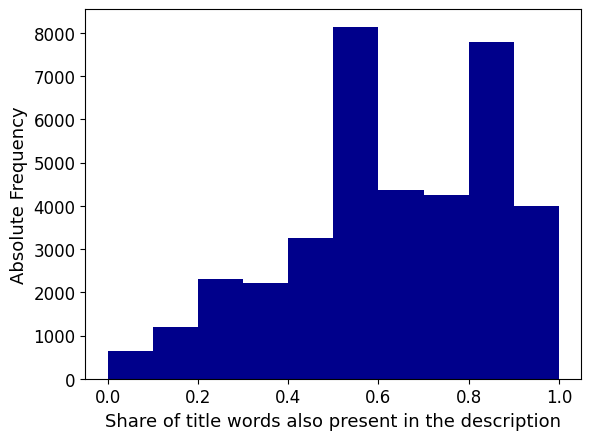

In [ ]:

plt.hist(mean_words_in_description, bins = 10, color = "darkblue")
plt.xlabel("Share of title words also present in the description", fontsize=13)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.savefig("Mean_words_title_description.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Mean_words_title_description.png", bbox_inches="tight")
plt.show()

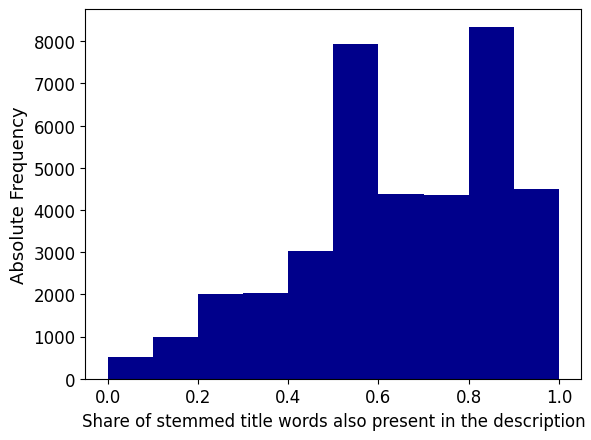

In [ ]:
# again - after stemming


plt.hist(mean_words_in_description_after_stemming, bins = 10, color = "darkblue")
#plt.xlim(0, 0.45)
plt.xlabel("Share of stemmed title words also present in the description", fontsize=12)
plt.ylabel("Absolute Frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.savefig("Mean_words_title_description_after_stemming.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/Mean_words_title_description_after_stemming.png", bbox_inches="tight")
plt.show()



The checks on the degree of extractivenss/abstractiveness only refer to  n-grams of n=1.

Literature suggests that the degree of extractiveness measured in shared n-grams with n>1 might also be indicative of how well extractive / extractive algotihms work.

In [ ]:
import re
import math
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import collections

# setting up stemmer object
ps = PorterStemmer()


In [ ]:

def retrieve_unique_n_grams(n: int, list_words_title, list_words_title_stemmed, list_words_des, list_words_des_stemmed) -> tuple:

  """
  This function computes the shares of n-grmas in the title that are also present in the description for both
  the stemmed title/description and the non-stemmed counterparts.
  n can be specified for flexibility.
  """

  ## n-grmas lists for titles

  # 1) without stemming
  counts = collections.Counter()
  counts.update(nltk.ngrams(list_words_title, n))
  unique_n_grams_title = list(counts.keys() )

  # 2) with stemming
  counts = collections.Counter()
  counts.update(nltk.ngrams(list_words_title_stemmed, n))
  unique_n_grams_title_stemmed = list(counts.keys() )


  ## n-grams for descriptions

  # 1) without stemming
  counts = collections.Counter()
  counts.update(nltk.ngrams(list_words_des, n))
  unique_n_grams_des = list(counts.keys() )

  # 2) with stemming
  counts = collections.Counter()
  counts.update(nltk.ngrams(list_words_des_stemmed, n))
  unique_n_grams_des_stemmed = list(counts.keys() )

  ### Computation of n-grams shares

  # checking relative amount of n-grmas  in title als in description
  rel_n_grams = sum(x in unique_n_grams_des for x in unique_n_grams_title) / len(unique_n_grams_title)

  # checking relative amount of n-grmas  in title als in description - after stemming
  rel_n_grams_stemm = sum(x in unique_n_grams_des_stemmed for x in unique_n_grams_title_stemmed) / len(unique_n_grams_title_stemmed)

  return (rel_n_grams, rel_n_grams_stemm)

In [ ]:
## looping thorugh DF two retrieve n_gram shares

list_two_gram, list_two_gram_stemmed = np.zeros(airbnb_london_filtered_3.shape[0]), np.ones(airbnb_london_filtered_3.shape[0])
list_three_gram, list_three_gram_stemmed = np.zeros(airbnb_london_filtered_3.shape[0]), np.ones(airbnb_london_filtered_3.shape[0])


for i in range(airbnb_london_filtered_3.shape[0]):

  ## words in title
  list_words_title =  remove_non_alpha_lower(airbnb_london_filtered_3.name[i])

  # also after stemming
  list_words_title_stemmed = [ps.stem(a) for a in list_words_title]


  ## words in Description
  list_words_des = remove_non_alpha_lower(airbnb_london_filtered_3.description[i])

  # also after stemming
  list_words_des_stemmed = [ps.stem(a) for a in list_words_des]


  ## for n = 2
  output_two = retrieve_unique_n_grams(2, list_words_title, list_words_title_stemmed, list_words_des, list_words_des_stemmed)
  two_gram, two_gram_stemmed = output_two[0], output_two[1]


  ## for n = 3
  ## for n = 2
  output_three = retrieve_unique_n_grams(3, list_words_title, list_words_title_stemmed, list_words_des, list_words_des_stemmed)
  three_gram, three_gram_stemmed = output_three[0], output_three[1]

  ## filing in lists
  list_two_gram[i]  = two_gram
  list_two_gram_stemmed[i]  = two_gram_stemmed

  list_three_gram[i]  = three_gram
  list_three_gram_stemmed[i]  = three_gram_stemmed



In [ ]:
### Share of n-grams in title to also be found in description

# n = 2
print(f'{np.round(np.mean(list_two_gram), 2)} is the mean share of n-grmans for n=2 in the title to also be present in the description.')
print(f'{np.round(np.mean(list_two_gram_stemmed), 2)} is the mean share of stemmed n-grams for n=2 in the title to also be present in the (stemmed) description.')

print("----------------------------------------------------------------------------------")

# n = 3
print(f'{np.round(np.mean(list_three_gram), 2)} is the mean share of n-grmans for n=3 in the title to also be present in the description.')
print(f'{np.round(np.mean(list_three_gram_stemmed), 2)} is the mean share of stemmed n-grams for n=3 in the title to also be present in the (stemmed) description.')



0.21 is the mean share of n-grmans for n=2 in the title to also be present in the description.
0.21 is the mean share of stemmed n-grams for n=2 in the title to also be present in the (stemmed) description.
----------------------------------------------------------------------------------
0.08 is the mean share of n-grmans for n=3 in the title to also be present in the description.
0.08 is the mean share of stemmed n-grams for n=3 in the title to also be present in the (stemmed) description.


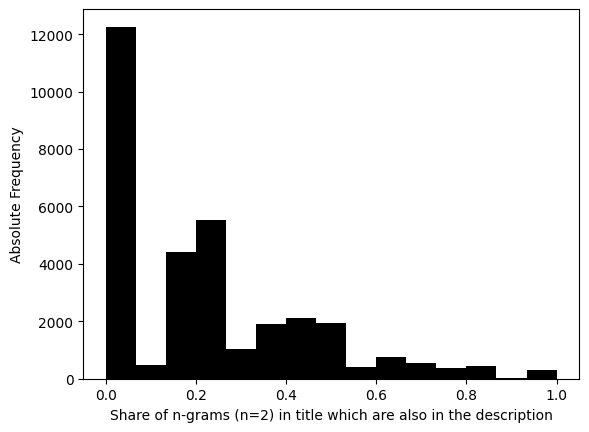

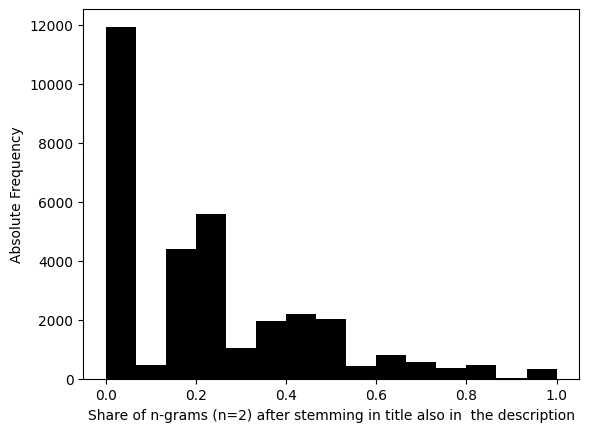

In [ ]:

plt.hist(list_two_gram, bins = 15, color = "black")
plt.xlabel("Share of n-grams (n=2) in title which are also in the description")
plt.ylabel("Absolute Frequency")
plt.savefig("N_gram_frequency_n_2.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/N_gram_frequency_n_2.png")
plt.show()


plt.hist(list_two_gram_stemmed, bins = 15, color = "black")
plt.xlabel("Share of n-grams (n=2) after stemming in title also in  the description")
plt.ylabel("Absolute Frequency")
plt.savefig("N_gram_frequency_n_2_stem.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/N_gram_frequency_n_2_stem.png")
plt.show()


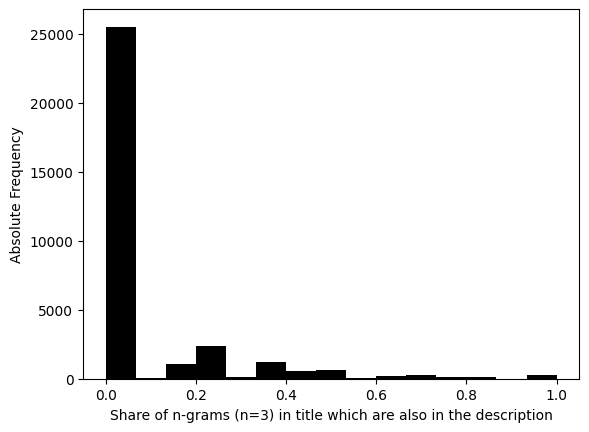

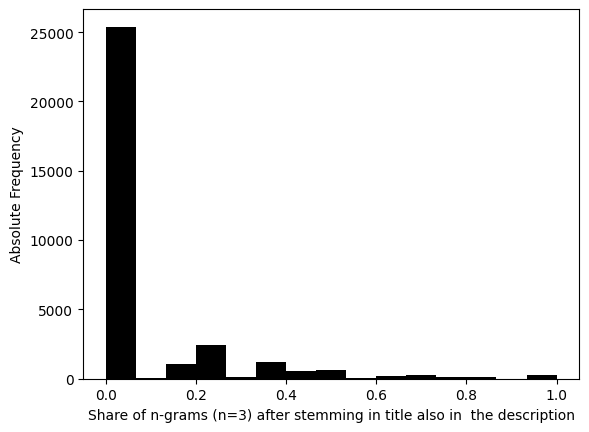

In [ ]:
plt.hist(list_three_gram, bins = 15, color = "black")
plt.xlabel("Share of n-grams (n=3) in title which are also in the description")
plt.ylabel("Absolute Frequency")
plt.savefig("N_gram_frequency_n_3.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/N_gram_frequency_n_2.png")
plt.show()


plt.hist(list_three_gram_stemmed, bins = 15, color = "black")
plt.xlabel("Share of n-grams (n=3) after stemming in title also in  the description")
plt.ylabel("Absolute Frequency")
plt.savefig("N_gram_frequency_n_3_stem.png")
plt.savefig("/content/gdrive/My Drive/Thesis/Plots/N_gram_frequency_n_3_stem.png")
plt.show()
